# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [116]:
data = pd.read_csv('ToyotaCorolla.csv',encoding="ISO-8859-1")

In [117]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [118]:
d = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [119]:
d.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [120]:
d.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [29]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
Price            1436 non-null int64
Age_08_04        1436 non-null int64
KM               1436 non-null int64
HP               1436 non-null int64
cc               1436 non-null int64
Doors            1436 non-null int64
Gears            1436 non-null int64
Quarterly_Tax    1436 non-null int64
Weight           1436 non-null int64
dtypes: int64(9)
memory usage: 101.0 KB


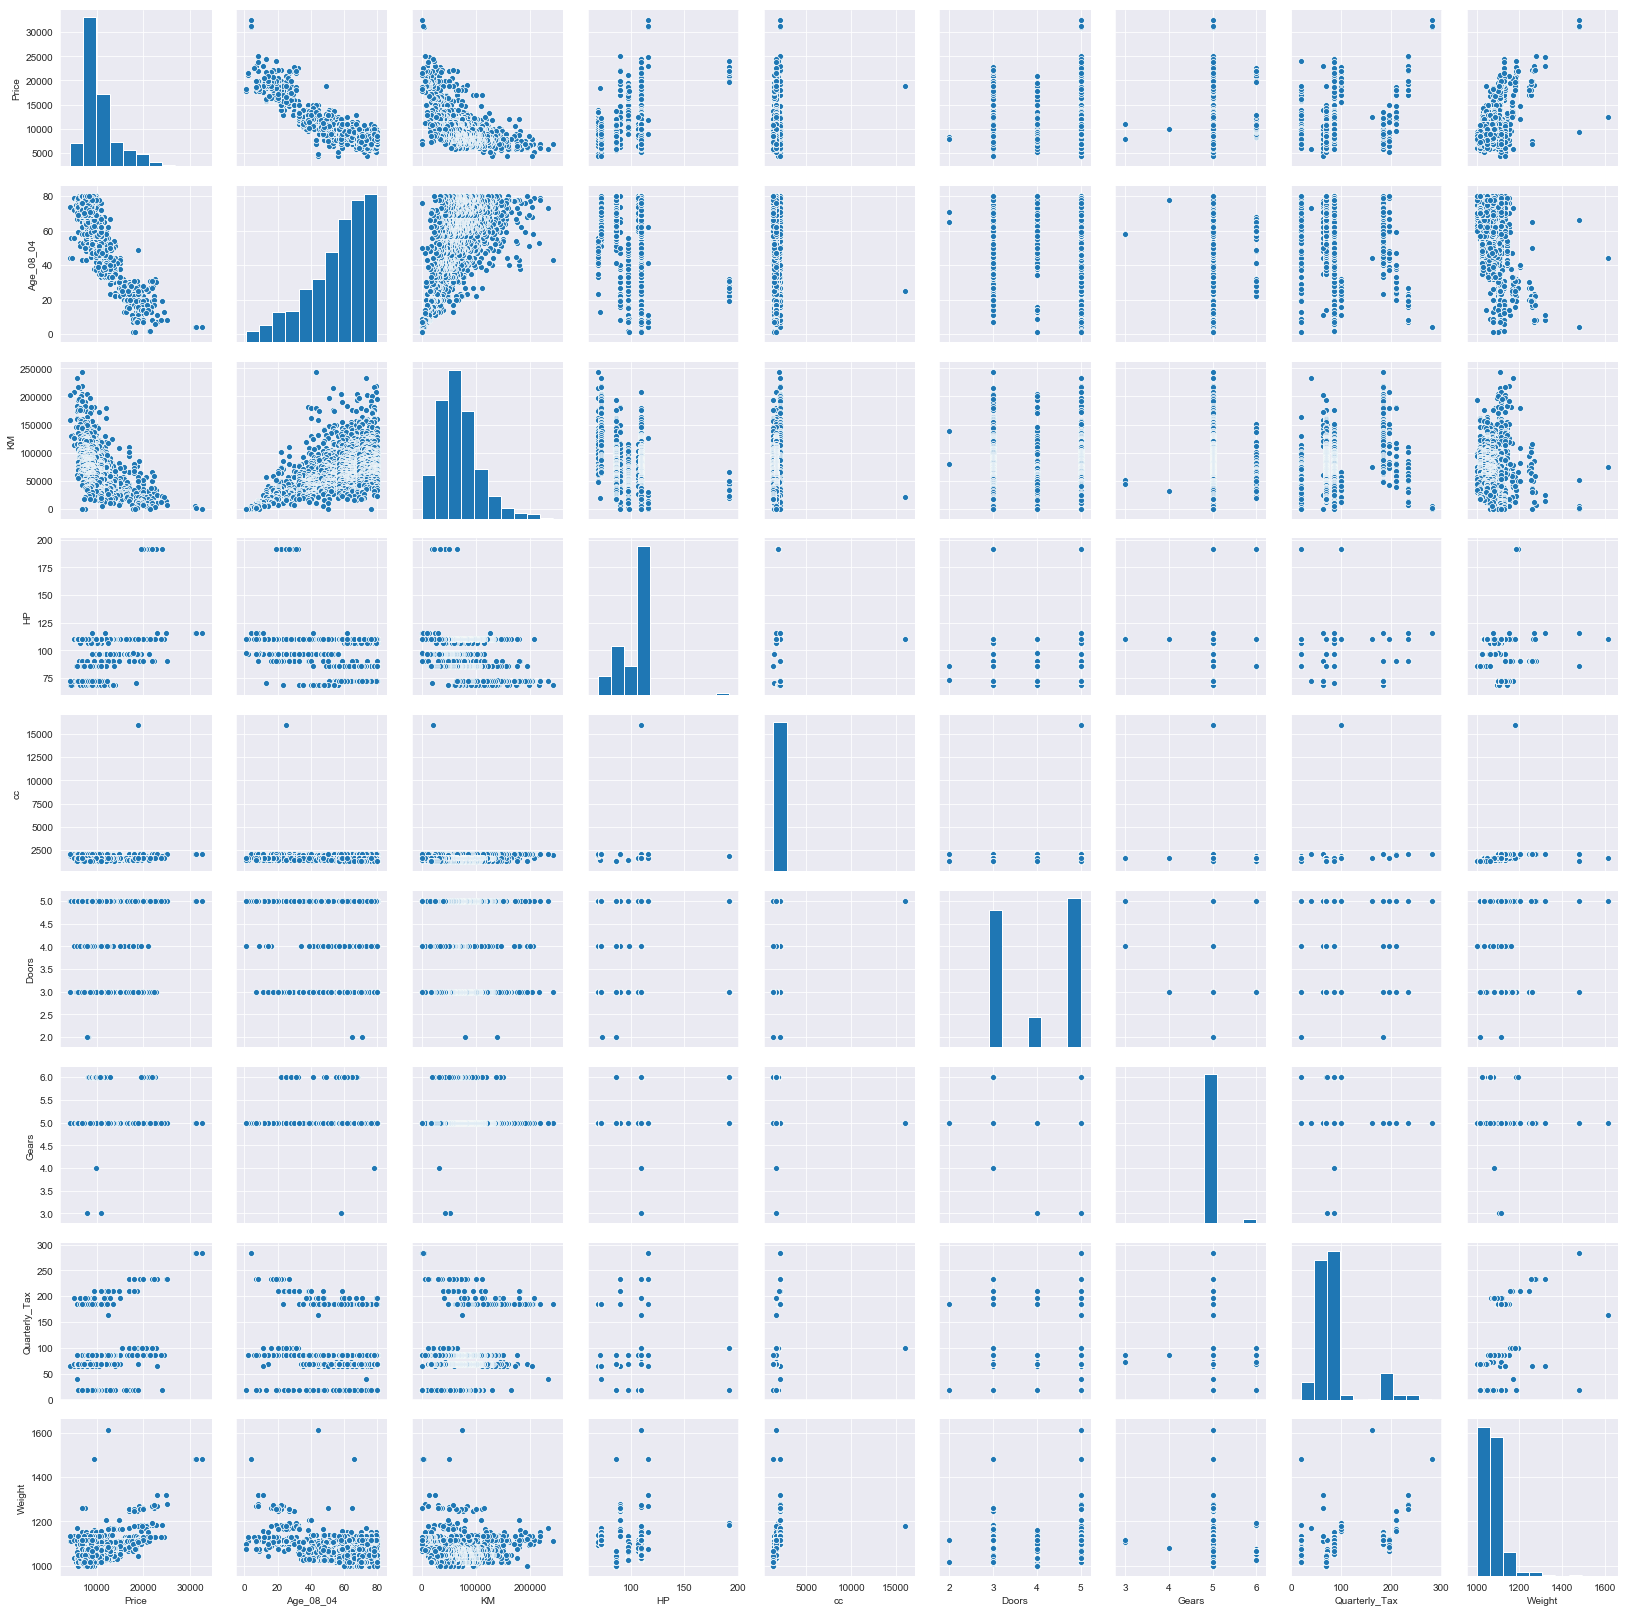

In [30]:
sns.set_style(style='darkgrid')
sns.pairplot(d)

In [31]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = d).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:30:40   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model1 = smf.ols('Price~Doors',data = d).fit() 

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.46e-12
Time:                        10:43:07   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = d).fit().rsquared
vif_age = 1/(1-rsq_age)
rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = d).fit().rsquared
vif_km = 1/(1-rsq_km)
rsq_hp = smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data = d).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_cc = smf.ols('cc~HP+KM+Age_08_04+Doors+Gears+Quarterly_Tax+Weight',data = d).fit().rsquared
vif_cc = 1/(1-rsq_cc)
rsq_door = smf.ols('Doors~HP+KM+Age_08_04+cc+Gears+Quarterly_Tax+Weight',data = d).fit().rsquared
vif_door = 1/(1-rsq_door)
rsq_gear = smf.ols('Gears~HP+KM+Age_08_04+cc+Doors+Quarterly_Tax+Weight',data = d).fit().rsquared
vif_gear = 1/(1-rsq_gear)
rsq_Q = smf.ols('Quarterly_Tax~HP+KM+Age_08_04+cc+Doors+Gears+Weight',data = d).fit().rsquared
vif_Q = 1/(1-rsq_Q)
rsq_w = smf.ols('Weight~HP+KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax',data = d).fit().rsquared
vif_w = 1/(1-rsq_w)
data_vif = {'parameters':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_Q,vif_w]}
dataframe_vif=pd.DataFrame(data_vif)
dataframe_vif

,parameters,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


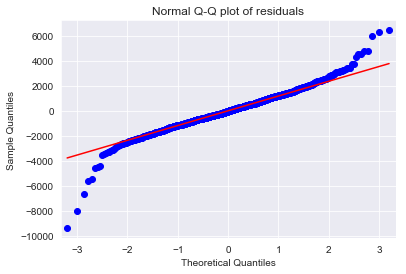

In [42]:
import statsmodels.api as sm
qq_plot = sm.qqplot(model.resid,line ='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [43]:
def get_values(vals):
    return ((vals-vals.mean())/vals.std())

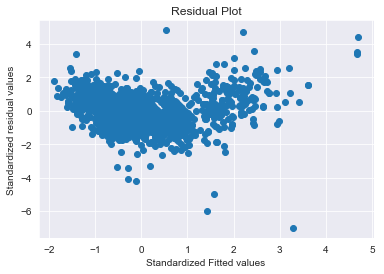

In [44]:
plt.scatter(get_values(model.fittedvalues),get_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

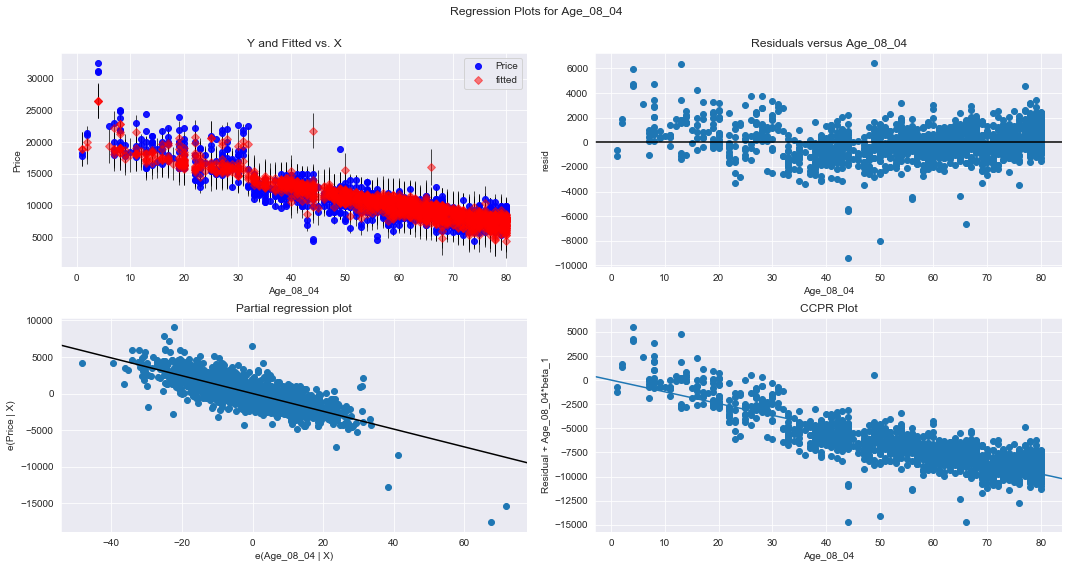

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

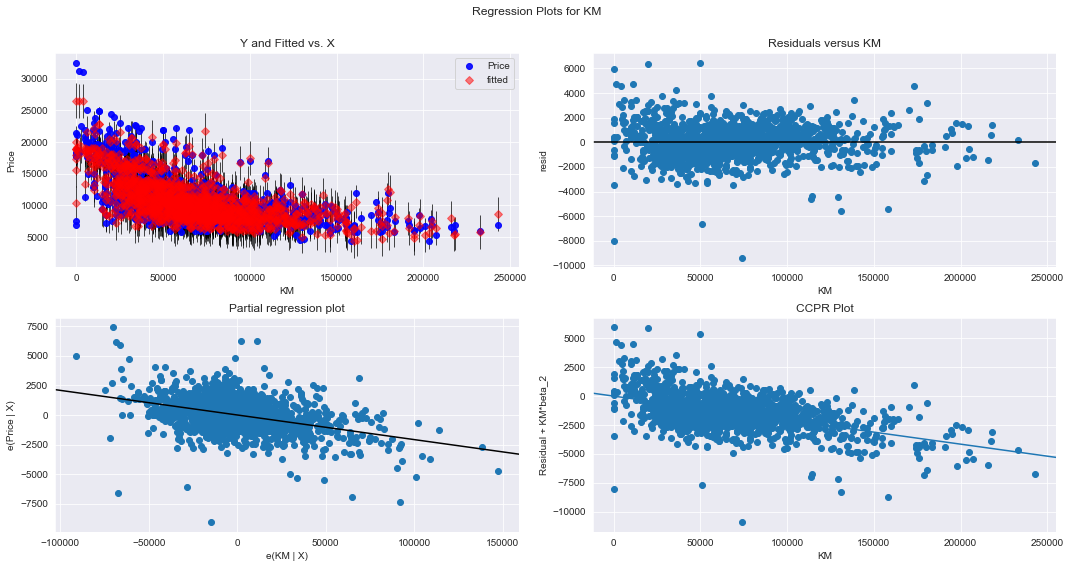

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

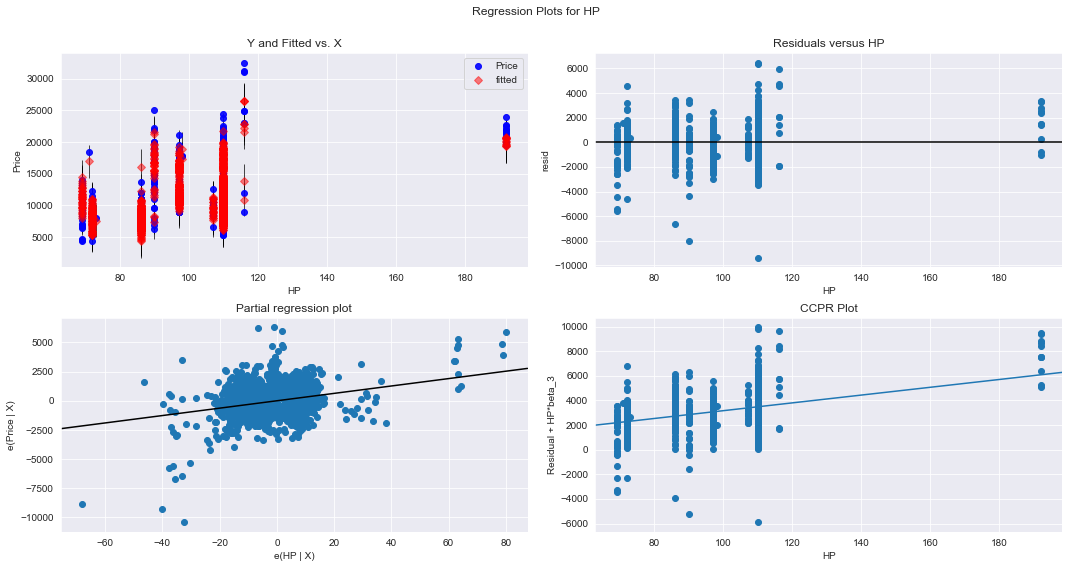

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

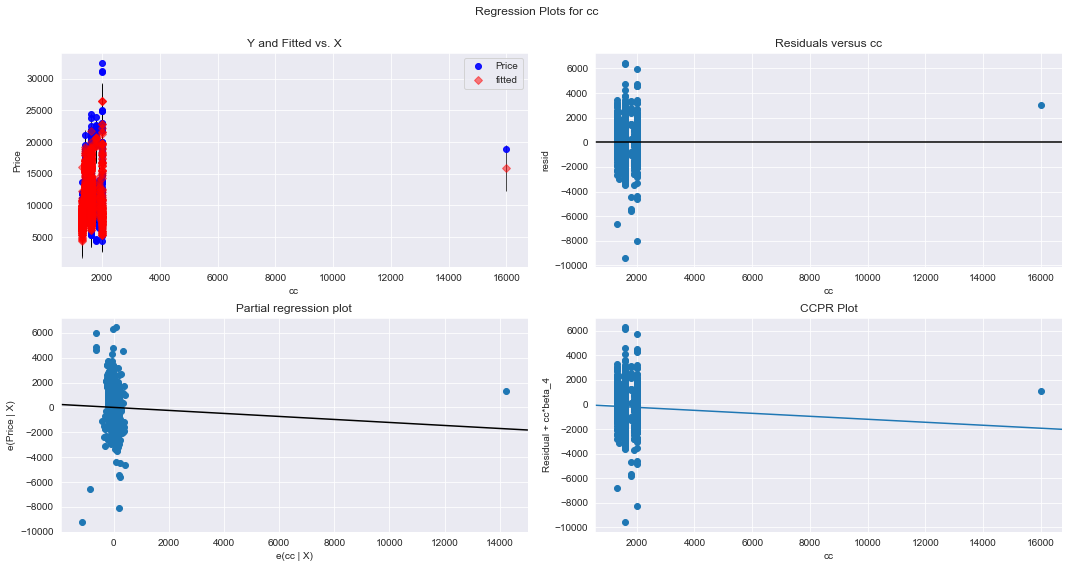

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

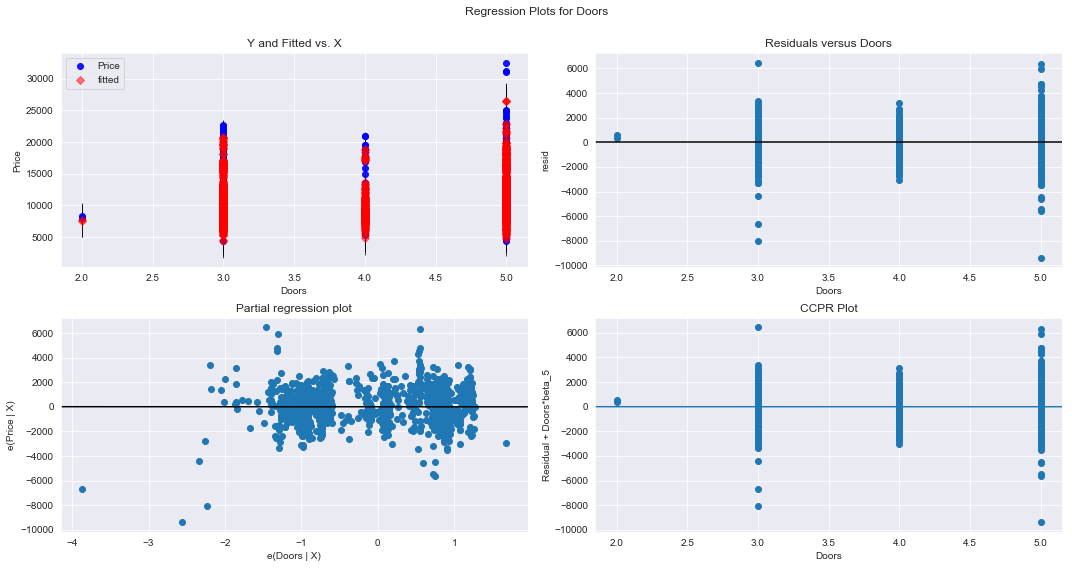

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

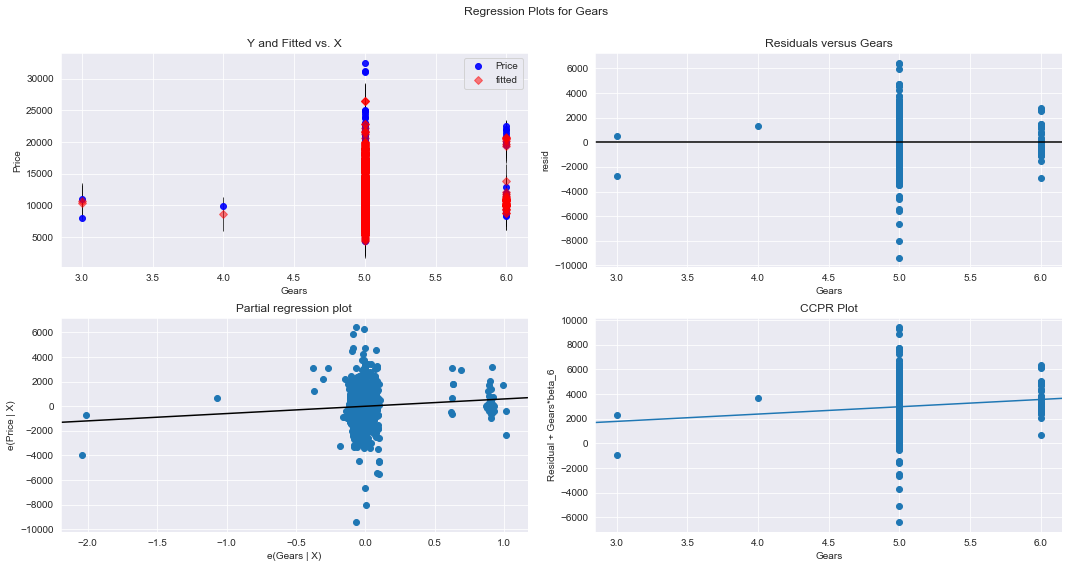

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

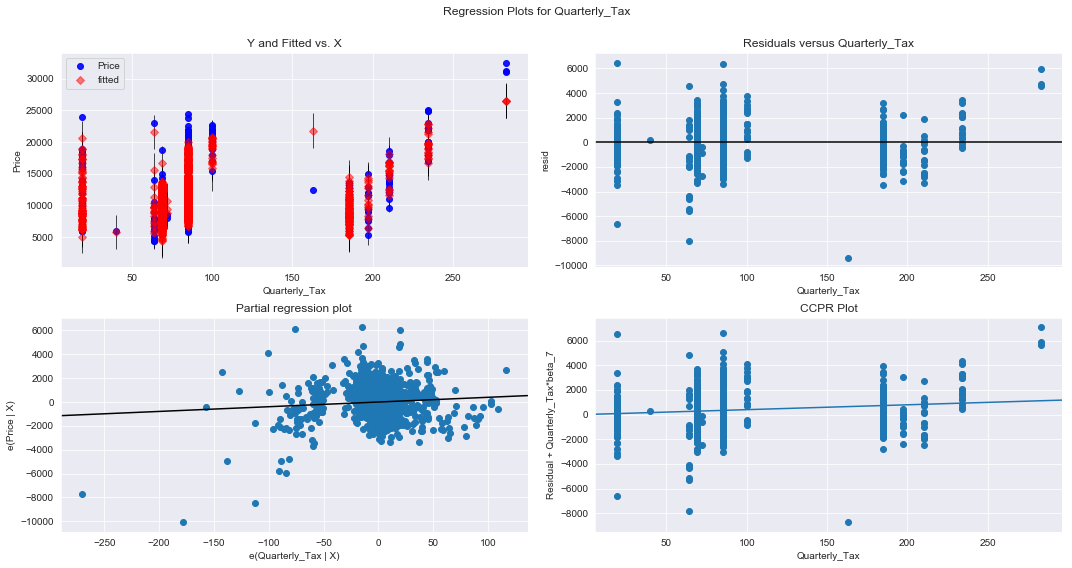

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

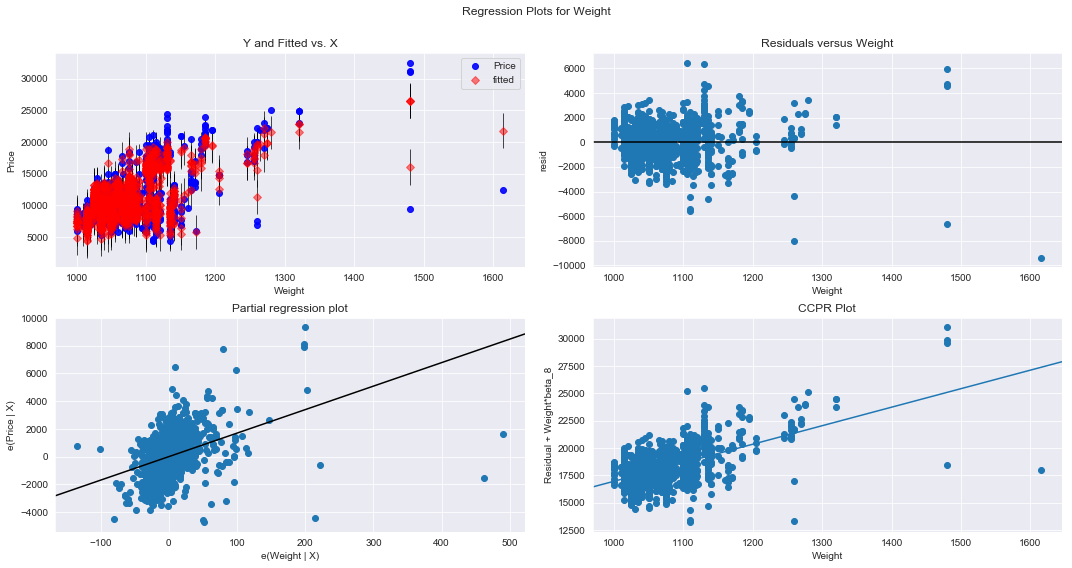

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [54]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

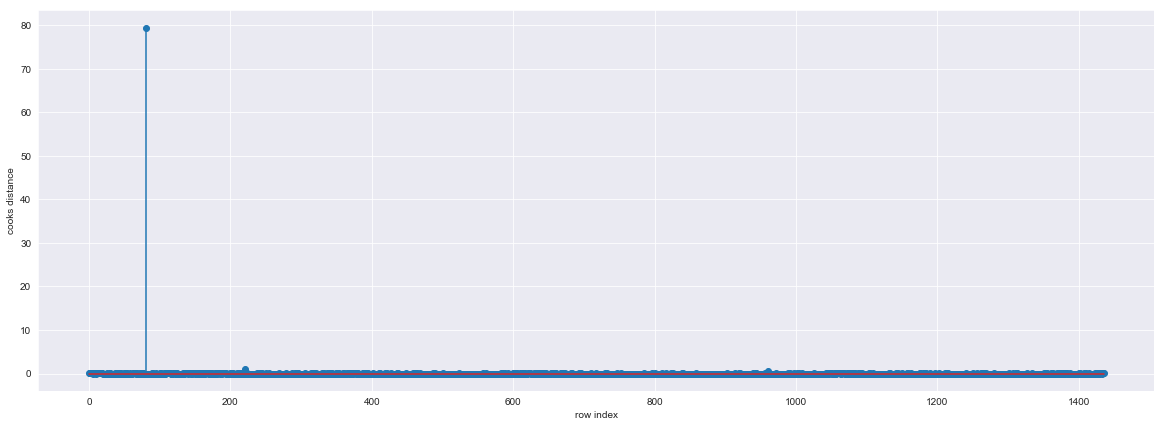

In [55]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(d)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [56]:
c.argmax(),c.max()

(80, 79.52010624138055)

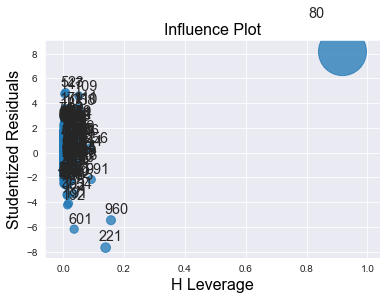

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [62]:
d[d.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [63]:
d2 = d.drop(d.index[80],axis=0).reset_index()

In [64]:
d2.tail()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015
1434,1435,6950,76,1,110,1600,5,5,19,1114


In [65]:
d2 = d2.drop('index',axis = 1)

In [66]:
d2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [67]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = d2).fit()

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:43:27   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
model_influence1 = model1.get_influence()
(x,_)=model_influence1.cooks_distance

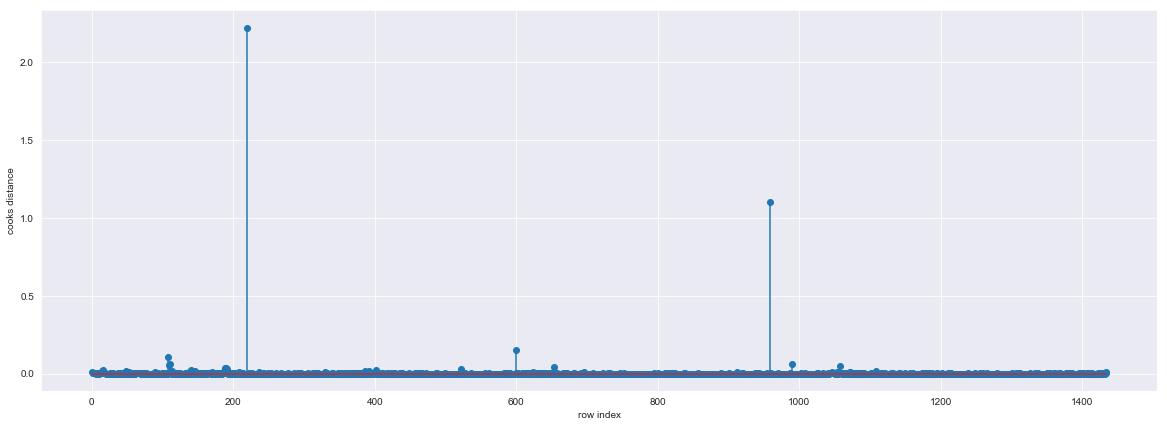

In [77]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(d2)),np.round(x,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()


In [78]:
x.argmax(),x.max()

(220, 2.2244611713001508)

In [74]:
d2.shape

(1435, 9)

In [75]:
3*(9)/1435

0.018815331010452963

In [79]:
d2[d2.index.isin([220])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
220,12450,44,74172,110,1600,5,5,163,1615


In [85]:
d3 = d2.drop(d2.index[80],axis=0).reset_index()

In [86]:
d3.tail()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015
1433,1434,6950,76,1,110,1600,5,5,19,1114


In [87]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = d3).fit()

In [88]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:55:36   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6281.3154   1382.716     -4.543      0.000   -8993.693   -3568.938
Age_08_04      -120.4096      2.562    -46.998      0.000    -125.435    -115.384
KM               -0.0178      0.001    -13.954      0.000      -0.020      -0.015
HP               39.3549      2.911     13.519      0.000      33.644      45.065
cc               -2.5267      0.307     -8.224      0.000      -3.129      -1.924
Doors           -28.0419     39.248     -0.714      0.475    -105.032      48.949
Gears           523.9417    192.860      2.717      0.007     145.621     902.262
Quarterly_Tax     9.0568      1.425      6.356      0.000       6.262      11.852
Weight           20.1625      1.116     18.073      0.000      17.974      22.351
==============================================================================
Omnibus:                      246.389   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2708.190
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       9.675   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model_influence2 = model2.get_influence()
(y,_)=model_influence2.cooks_distance

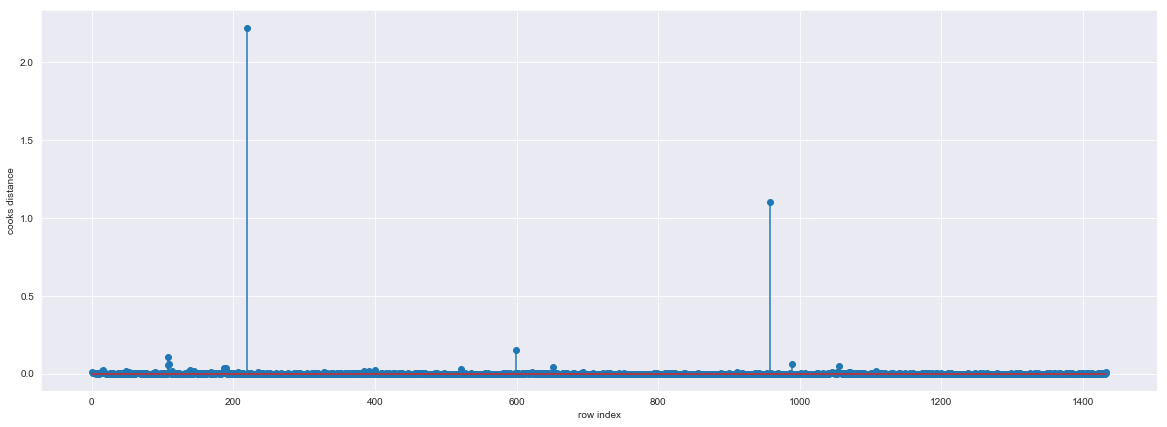

In [92]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(d3)),np.round(y,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()


In [93]:
y.argmax(),y.max()

(219, 2.2235595010077605)

In [95]:
d3[d3.index.isin([219])]

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
219,220,12450,44,74172,110,1600,5,5,163,1615


In [96]:
d4 = d3.drop(d3.index[219],axis = 0).reset_index()

In [98]:
d4.tail()

,level_0,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1428,1429,1430,7500,69,20544,86,1300,3,5,69,1025
1429,1430,1431,10845,72,19000,86,1300,3,5,69,1015
1430,1431,1432,8500,71,17016,86,1300,3,5,69,1015
1431,1432,1433,7250,70,16916,86,1300,3,5,69,1015
1432,1433,1434,6950,76,1,110,1600,5,5,19,1114


In [102]:
d4 = d4.drop(['index','level_0'],axis=1)

In [103]:
d4.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [104]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = d4).fit()

In [105]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:07:47   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.460e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.690     -7.343      0.000    -1.3e+04   -7510.286
Age_08_04      -116.5347      2.509    -46.453      0.000    -121.456    -111.614
KM               -0.0173      0.001    -13.948      0.000      -0.020      -0.015
HP               39.3016      2.816     13.957      0.000      33.778      44.826
cc               -3.2079      0.305    -10.519      0.000      -3.806      -2.610
Doors           -66.1587     38.158     -1.734      0.083    -141.011       8.693
Gears           485.0557    186.596      2.600      0.009     119.024     851.088
Quarterly_Tax     7.9793      1.382      5.772      0.000       5.267      10.691
Weight           25.0453      1.186     21.126      0.000      22.720      27.371
==============================================================================
Omnibus:                      197.603   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1767.323
Skew:                          -0.314   Prob(JB):                         0.00
Kurtosis:                       8.404   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
final_model = model3

In [108]:
pd.DataFrame({'models':['model','model1','model2','final_model'],'r_sqauarevalues':[model.rsquared,model1.rsquared,model2.rsquared,final_model.rsquared]})

,models,r_sqauarevalues
0,model,0.863763
1,model1,0.869379
2,model2,0.869181
3,final_model,0.877662


In [112]:
sample_data = d4.iloc[25:56,1:]

In [122]:
actual_val = d4.Price[25:56]

In [123]:
actual_val

25    15950
26    17495
27    15750
28    16950
29    17950
30    12950
31    15750
32    15950
33    14950
34    15500
35    15750
36    15950
37    14950
38    15750
39    14750
40    13950
41    16750
42    13950
43    16950
44    16950
45    19000
46    17950
47    15800
48    17950
49    21950
50    17950
51    15750
52    20500
53    21950
54    15500
55    13250
Name: Price, dtype: int64

In [124]:
pred_values = final_model.predict(sample_data)

In [125]:
pred_values

25    16493.908012
26    16155.668039
27    15804.055269
28    15873.534969
29    16210.785217
30    15453.568526
31    16356.813942
32    15872.305438
33    15933.934012
34    16256.716393
35    15756.067172
36    16183.195882
37    16675.093616
38    15361.776058
39    15906.988437
40    16117.656550
41    15621.103900
42    16153.858008
43    17215.211593
44    17973.094597
45    18512.637158
46    17750.623911
47    15787.346314
48    18456.844777
49    20096.307010
50    18622.132559
51    15165.007082
52    17392.082746
53    20338.220055
54    17250.911521
55    14120.724044
dtype: float64

In [126]:
sample_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
25,25,28450,110,1600,3,5,85,1120
26,27,34545,110,1600,3,5,85,1120
27,29,41415,110,1600,3,5,85,1120
28,28,44142,110,1600,3,5,85,1120
29,30,11090,110,1600,3,5,85,1120
30,29,9750,97,1400,3,5,19,1100
31,22,35199,97,1400,3,5,85,1100
32,27,29510,97,1400,3,5,85,1100
33,26,32692,97,1400,3,5,85,1100
34,22,41000,97,1400,3,5,85,1100
